<a href="https://colab.research.google.com/github/KrishnaSChavan/MachineLearning/blob/main/LSTM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import zipfile
x = zipfile.ZipFile('/content/main.zip','r')
x.extractall()
x.close()

In [90]:
import pandas as pd
import numpy as np

x = pd.read_csv('/content/recurrent-neural-networks-2478142-main/Exercise Files/requests_every_hour.csv')

In [ ]:
x

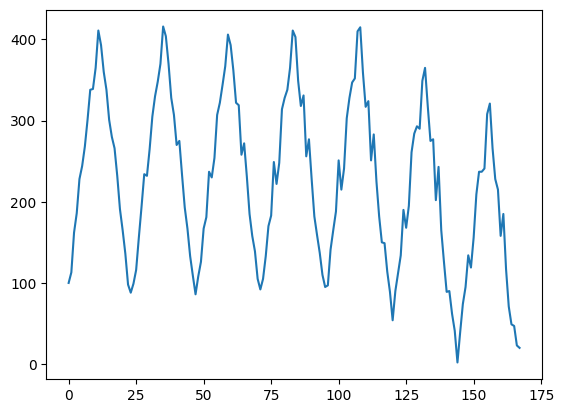

In [28]:
from matplotlib import pyplot as plt
plt.plot(x.head(168))

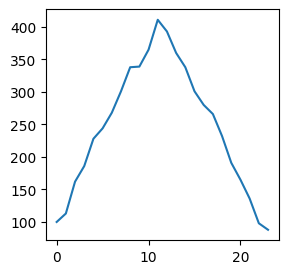

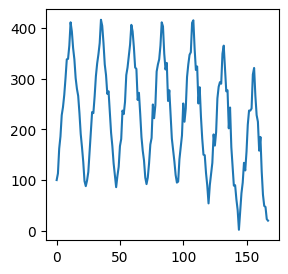

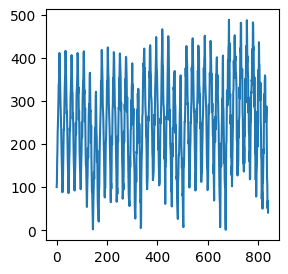

In [32]:
plt.figure(figsize=(3,3))
plt.plot(x.head(24))
plt.figure(figsize=(3,3))
plt.plot(x.head(168))
plt.figure(figsize=(3,3))
plt.plot(x)

# Preprocessing Data

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [54]:
x.shape

(840, 1)

In [51]:
train_size = 24*7*4
lookback = 24*7

x_train = x[:train_size,:]
x_test = x[train_size-lookback:,:]

In [52]:
x_train.shape

(672, 1)

In [53]:
x_test.shape

(336, 1)

In [57]:
def create_rnn_dataset(data,lookback=1):
    x_data ,y_data = [],[]

    for i in range(len(data)-lookback-1):
        x_data.append(data[i:(i+lookback),0])
        y_data.append(data[i+lookback,0])
    return np.array(x_data),np.array(y_data)

In [58]:
train_data,train_op = create_rnn_dataset(x_train,lookback=lookback)
test_data,test_op = create_rnn_dataset(x_test,lookback=lookback)

In [59]:
train_data.shape,train_op.shape

((503, 168), (503,))

In [62]:
def reshape(data):
    return np.reshape(data,(data.shape[0],1,data.shape[1]))

In [63]:
train_data = reshape(train_data)

In [64]:
train_data.shape

(503, 1, 168)

In [65]:
test_data = reshape(test_data)

In [66]:
test_data.shape

(167, 1, 168)

# Building model

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
tf.random.set_seed(42)

model = Sequential([
    LSTM(256,input_shape=(1,lookback)),
    Dense(1)
])

model.compile(
    loss='mean_squared_error',
    optimizer = 'adam',
    metrics = ['mse']
)

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               435200    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 435,457
Trainable params: 435,457
Non-trainable params: 0
_________________________________________________________________


In [72]:
history = model.fit(
    test_data,
    test_op,
    validation_data = (test_data,test_op),
    epochs = 5
)

Epoch 1/5
6/6 [==============================] - 2s 91ms/step - loss: 0.4531 - mse: 0.4531 - val_loss: 0.4280 - val_mse: 0.4280
Epoch 2/5
6/6 [==============================] - 0s 12ms/step - loss: 0.2927 - mse: 0.2927 - val_loss: 0.1541 - val_mse: 0.1541
Epoch 3/5
6/6 [==============================] - 0s 14ms/step - loss: 0.1731 - mse: 0.1731 - val_loss: 0.1302 - val_mse: 0.1302
Epoch 4/5
6/6 [==============================] - 0s 10ms/step - loss: 0.1208 - mse: 0.1208 - val_loss: 0.0993 - val_mse: 0.0993
Epoch 5/5
6/6 [==============================] - 0s 10ms/step - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0850 - val_mse: 0.0850


<Axes: >

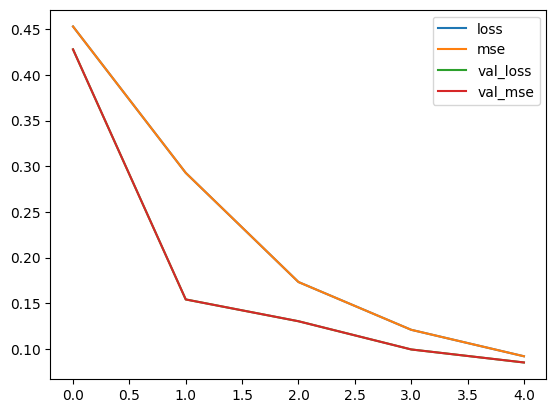

In [73]:
pd.DataFrame(history.history).plot()

In [76]:
model.evaluate(test_data,test_op)

6/6 [==============================] - 0s 7ms/step - loss: 0.0850 - mse: 0.0850


[0.08501943945884705, 0.08501943945884705]

In [77]:
pred_train = model.predict(train_data)
pred_test = model.predict(test_data)

6/6 [==============================] - 0s 3ms/step


In [78]:
final_train = scaler.inverse_transform(pred_train)
final_test = scaler.inverse_transform(pred_test)

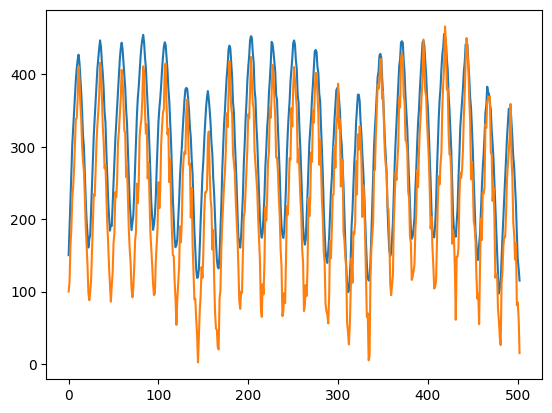

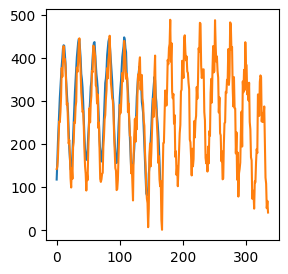

In [94]:
plt.plot(final_train)
plt.plot(y[:len(final_train)])
plt.figure(figsize=(3,3))
plt.plot(final_test)
plt.plot(scaler.inverse_transform(x_test))